# Qiskit Workbook Workstation

This is workstation for the Qiskit Textbook page from **Qiskit** comprehensive documentation (https://qiskit.org/) It will be a Notebook to store all the solved exercises we encounter in the Qiskit Textbook, and further the main quantum computing algorithms we can find and run/solve/*improve* in the textbook.

In [ ]:
!pip install qiskit


# Getting Qiskit started

In the following cells I'll present exampl,les of the first basic operations we can do in Qiskit. This will be pf further relevance as we move forward with the Textbook.

In [1]:
import qiskit
import matplotlib as plt
import numpy as np
import pandas as pd
import math 

In [2]:
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram 

In [3]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()



Total count for 00 and 11 are: {'00': 473, '11': 527}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

# The Atoms of Computation Chapter

Below I now analyze and solve some of the problems in the section from chapter 1 at the Qiskit Textbook. (...) In this we are expressing numbers as multiples of 2, 4, 8, 16, 32, etc. instead of 10, 100, 1000, etc. 

In [10]:
!pip install ./qiskit-textbook-src

from qiskit import (qiskit_texbook)
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5) 

ERROR: Invalid requirement: './qiskit-textbook-src'
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


ImportError: cannot import name 'qiskit_texbook'

# The first Quantum Circuit

Below we sketch the script for the building of the our first quantum computing circuit. As stated (quoted from the textbook): " In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a circuit with eight qubits and eight outputs. " In our case we could do instead a ten qubit circuit:

In [4]:
n = 10
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

" This circuit, which we have called qc_output, is created by Qiskit using QuantumCircuit. The number n_q defines the number of qubits in the circuit. With n_b we define the number of output bits we will extract from the circuit at the end.

The extraction of outputs in a quantum circuit is done using an operation called measure. Each measurement tells a specific qubit to give an output to a specific output bit. The following code adds a measure operation to each of our eight qubits. The qubits and bits are both labelled by the numbers from 0 to 7 (because that’s how programmers like to do things). The command qc.measure(j,j) adds a measurement to our circuit qc that tells qubit j to write an output to bit j. "

In [5]:
for j in range(n):
    qc_output.measure(j,j)

We can now check a **Qiskit** vizualization of the circuit we created by the *draw()* method. 

In [6]:
qc_output.draw()


┌─┐                           
 q_0: ┤M├───────────────────────────
      └╥┘┌─┐                        
 q_1: ─╫─┤M├────────────────────────
       ║ └╥┘┌─┐                     
 q_2: ─╫──╫─┤M├─────────────────────
       ║  ║ └╥┘┌─┐                  
 q_3: ─╫──╫──╫─┤M├──────────────────
       ║  ║  ║ └╥┘┌─┐               
 q_4: ─╫──╫──╫──╫─┤M├───────────────
       ║  ║  ║  ║ └╥┘┌─┐            
 q_5: ─╫──╫──╫──╫──╫─┤M├────────────
       ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_6: ─╫──╫──╫──╫──╫──╫─┤M├─────────
       ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├──────
       ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_8: ─╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
       ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_9: ─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
       ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 10/═╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
       0  1  2  3  4  5  6  7  8  9

The circuit above will always output a 0000000000 since we doo not input anything to our qubits. We can count these measurements running the circuit as much as we like and plotting a histogram:

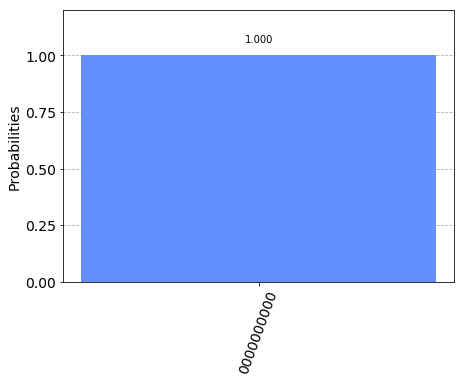

In [7]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts) 

# Creating an adder circuit

In this section we will create another circuit. We will now start to providing some input qubits to our circuit. This circuit will then performe what we call an adder circuit, that is, as circuit conveting inputs and outputing its summation. For this we need to know how to encode a binary string of bits as an input. That will be done by our first instance of a quantum gate: the NOT gate. *" Below we create a new circuit dedicated to the job of encoding and call it **qc_encode**. For now, we only specify the number of qubits. "*

In [11]:
qc_encode = QuantumCircuit(n)
qc_encode.x(9)

qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
          
q_7: ─────
          
q_8: ─────
     ┌───┐
q_9: ┤ X ├
     └───┘

*Extracting results can be done using the circuit we have from before: qc_output. Adding the two circuits using qc_encode + qc_output creates a new circuit with everything needed to extract an output added at the end.*

In [12]:
qc = qc_encode + qc_output
qc.draw()

┌─┐                           
 q_0: ─────┤M├───────────────────────────
           └╥┘┌─┐                        
 q_1: ──────╫─┤M├────────────────────────
            ║ └╥┘┌─┐                     
 q_2: ──────╫──╫─┤M├─────────────────────
            ║  ║ └╥┘┌─┐                  
 q_3: ──────╫──╫──╫─┤M├──────────────────
            ║  ║  ║ └╥┘┌─┐               
 q_4: ──────╫──╫──╫──╫─┤M├───────────────
            ║  ║  ║  ║ └╥┘┌─┐            
 q_5: ──────╫──╫──╫──╫──╫─┤M├────────────
            ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_6: ──────╫──╫──╫──╫──╫──╫─┤M├─────────
            ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_7: ──────╫──╫──╫──╫──╫──╫──╫─┤M├──────
            ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_8: ──────╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
      ┌───┐ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_9: ┤ X ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 10/══════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
            0  1  2  3  4  5  6  7  8  9

We can now look at the combined results plotted in an histogram:

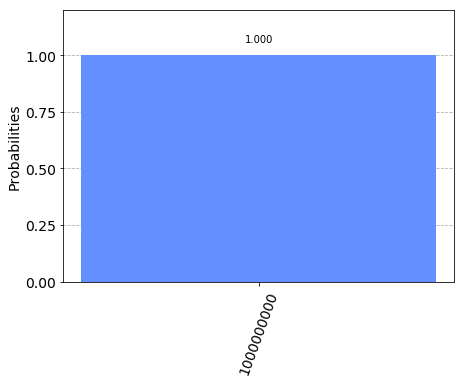

In [13]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Now our computer outputs the string 1000000000 instead.

The bit we flipped, which comes from qubit 9, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. Some prefer to number their bits the other way around, but Qiskit's system certainly has its advantages when we are using the bits to represent numbers. So in our case by flipping the 9th bit, we’ve now written the number 512 in our simple 10-bit computer.

I can draw my age 44 (BIN 10 1100) as a bit strinbg input to our circuit:

In [14]:
qc_encode = QuantumCircuit(n)
qc_encode.x(2)
qc_encode.x(3)
qc_encode.x(5)

qc_encode.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     └───┘
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────
          
q_8: ─────
          
q_9: ─────

*Now we know how to encode information in a computer. The next step is to process it: To take an input that we have encoded, and turn it into an output that we need.*



## Build the adder

We are now ready to build our adder with **Qiskit**. We will start by building an half-adder. This is separeated in three parts: a part of the circuit that encodes the qubit, a part that executes the algorithm and a part that extracts the result. The first part is changed whenever we change the input values, but the other two parts remain the same. 

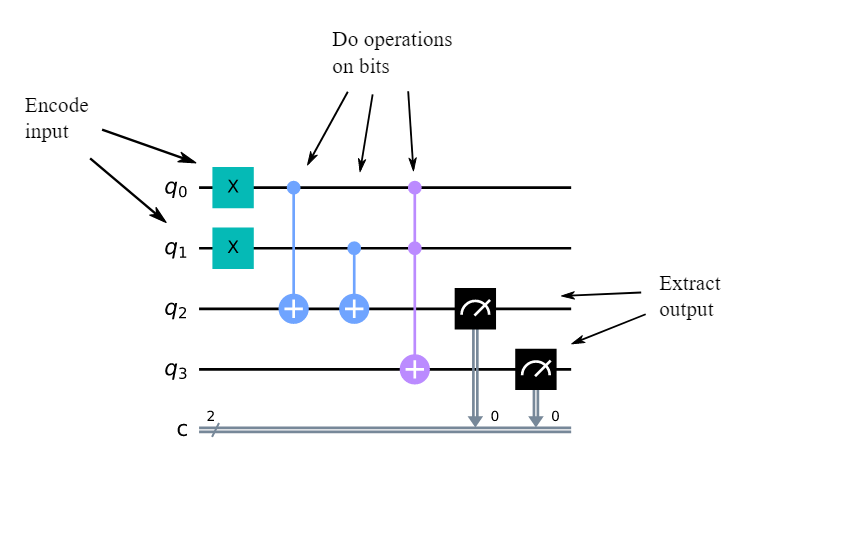

*The two bits we want to add are encoded in the qubits 0 and 1. The above example encodes a 1 in both these qubits, and so it seeks to find the solution of 1+1. The result will be a string of two bits, which we will read out from the qubits 2 and 3. All that remains is to fill in the actual program, which lives in the blank space in the middle.*

*The basic operations of computing are known as logic gates. We’ve already used the NOT gate, but this is not enough to make our half adder. We could only use it to manually write out the answers. Since we want the computer to do the actual computing for us, we’ll need some more powerful gates.

To see what we need, let’s take another look at what our half adder needs to do.

0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10* 

*To get this part of our solution correct, we need something that can figure out whether two bits are different or not. Traditionally, in the study of digital computation, this is called an XOR gate.*




*In quantum computers, the job of the XOR gate is done by the controlled-NOT gate. Since that's quite a long name, we usually just call it the CNOT. In Qiskit its name is cx, which is even shorter. In circuit diagrams, it is drawn as in the image below.*



In [15]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw() 

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

*There are multiple ways to explain the effect of the CNOT. One is to say that it looks at its two input bits to see whether they are the same or different. Next, it overwrites the target qubit with the answer. The target becomes 0 if they are the same, and 1 if they are different.*

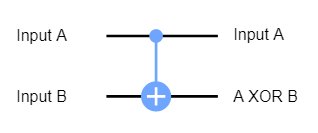 

*Another way of explaining the CNOT is to say that it does a NOT on the target if the control is 1, and does nothing otherwise. This explanation is just as valid as the previous one (in fact, it’s the one that gives the gate its name).*

Try the CNOT out for yourself by trying each of the possible inputs. For example, here's a circuit that tests the CNOT with the input 01.

In [16]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [17]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.cx(1,0)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐┌─┐   
q_0: ─────┤ X ├┤M├───
     ┌───┐└─┬─┘└╥┘┌─┐
q_1: ┤ X ├──■───╫─┤M├
     └───┘      ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [19]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(1,0)
qc.measure(0,1)
qc.measure(1,0)
qc.draw()

┌───┐┌───┐┌─┐   
q_0: ┤ X ├┤ X ├┤M├───
     └───┘└─┬─┘└╥┘┌─┐
q_1: ───────■───╫─┤M├
                ║ └╥┘
c: 2/═══════════╩══╩═
                1  0

In [20]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.cx(0,1)
qc.measure(1,0)
qc.measure(0,1)
qc.draw()

┌─┐
q_0: ───────■─────┤M├
     ┌───┐┌─┴─┐┌─┐└╥┘
q_1: ┤ X ├┤ X ├┤M├─╫─
     └───┘└───┘└╥┘ ║ 
c: 2/═══════════╩══╩═
                0  1

In [21]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌─┐   
q_0: ───────■──┤M├───
     ┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

By now it should be stressed that this seemingly "*addition*" or "*summation*" is not of the usual type or common basic sum of two digits algortithms. This is using a loaded form of operation from linear algebra of summing two numbers, but numbers of a special type: **vectors** or **tensors**. Therefore what the CNOT does for us is the Quantum Mechanical operation of *entanglement* between to qubits.

To know what *entanglement* is we must come to analyze this qiskit textbook with some Quantum Physics knowledge backgroung already learned. For our purposes here we just say that tthe two qubits are now in a particular form of linear close correlation, which permit us to operate the computations we want of a Quantum Computer and its units of computation, the qubits.


We can now formalize our half-adder as a quantum half adder. We are now in part two of the aforementioned parts, and we can excute a more formal algorithm. The last part will be about measurement and storing/extraction of the results. We can do it in a single notebook cell as follows:

In [22]:
qc_half_adder = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_half_adder.x(0) # For a=0, remove this line. For a=1, leave it.
qc_half_adder.x(1) # For b=0, remove this line. For b=1, leave it.
qc_half_adder.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_half_adder.cx(0,2)
qc_half_adder.cx(1,2)
qc_half_adder.barrier()
# extract outputs
qc_half_adder.measure(2,0) # extract XOR value
qc_half_adder.measure(3,1)

qc_half_adder.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

There is one missing bit here now. We need to store an addition bit for the case where 1+1 = 10, as this bit might be useful to complete operations requirirng an extra bit for a *carrier overflow*, a common operation when adding large numbers in binary bits. But the explanation within the textbook is a better one tell in us what the complete quantum half adder must do to become fully operational (it is  succint explanation of the **Toffoli Gate** which becomes an important part of mots relevant quantum circuits and algorithms):  *" We are now halfway to a fully working half adder. We just have the other bit of the output left to do: the one that will live on qubit 3. If you look again at the four possible sums, you’ll notice that there is only one case for which this is 1 instead of 0: 1+1=10. It happens only when both the bits we are adding are 1. To calculate this part of the output, we could just get our computer to look at whether both of the inputs are 1. If they are — and only if they are — we need to do a NOT gate on qubit 3. That will flip it to the required value of 1 for this case only, giving us the output we need. For this, we need a new gate: like a CNOT but controlled on two qubits instead of just one. This will perform a NOT on the target qubit only when both controls are in state 1. This new gate is called the Toffoli. For those of you who are familiar with Boolean logic gates, it is basically an AND gate."* 

In [23]:
qc_half_adder = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_half_adder.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_half_adder.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_half_adder.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_half_adder.cx(0,2)
qc_half_adder.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_half_adder.ccx(0,1,3)
qc_half_adder.barrier()
# extract outputs
qc_half_adder.measure(2,0) # extract XOR value
qc_half_adder.measure(3,1) # extract AND value

qc_half_adder.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

By plotting an histogram we can vizualize what we get in termos of counts of results extracted:

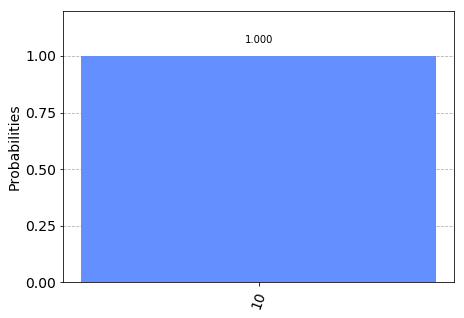

In [25]:
counts = execute(qc_half_adder,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

*"The result is 10, which is the binary representation of the number 2. We have built a computer that can solve the famous mathematical problem of 1+1!
 Now you can try it out with the other three possible inputs, and show that our algorithm gives the right results for those too."*

*" The half adder contains everything you need for addition. With the NOT, CNOT, and Toffoli gates, we can create programs that add any set of numbers of any size.
These three gates are enough to do everything else in computing too. In fact, we can even do without the CNOT. Additionally, the NOT gate is only really needed to create bits with value 1. The Toffoli gate is essentially the atom of mathematics. It is the simplest element, from which every other problem-solving technique can be compiled.
As we'll see, in quantum computing we split the atom."*